In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# 1 Transformación de datos

In [23]:
df = pd.read_csv("players_22.csv", low_memory=False)
#Escoger columnas necesarias
df = df[['short_name','age','nationality_name','overall','potential','club_name','value_eur','wage_eur','player_positions']]
#Debido a que hay jugadores con mas de una posición, se tomará unicamente la primera (index 0)
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]
#Eliminar valores nulos
df.dropna(inplace=True)

#Jugadores que se perderan la copa del munodo 2022
players_missing_WC = ['K. Benzema','S. Mané','S. Agüero','Sergio Ramos','P. Pogba','M. Reus','Diogo Jota',
                      'A. Harit','N. Kanté','G. Lo Celso']

eliminar = df[df['short_name'].isin(players_missing_WC)].index
df.drop(eliminar, axis=0, inplace=True)

#Utilizar solo las 32 selecciones que jugaron el mundial 2022
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

df = df[df['nationality_name'].isin(teams_worldcup)]

#Ordenar DataFrame por las columnas seleccionadas
df.sort_values(by=['overall','potential','value_eur'], ascending=False, inplace=True)

# 2 Distribuciones de puntajes de jugadores

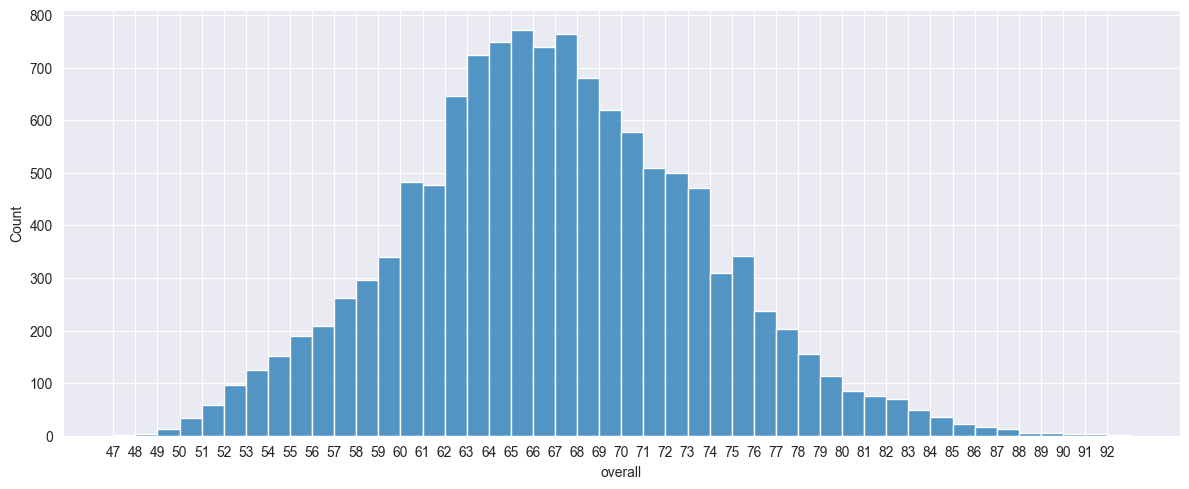

In [ ]:
# Gráfica que muestra cuantos jugadores hay por media
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)


bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

# 3 Dream Team Qatar 2022

In [ ]:
# Mejor jugador por posición
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


# 4 El mejor jugador de cada país

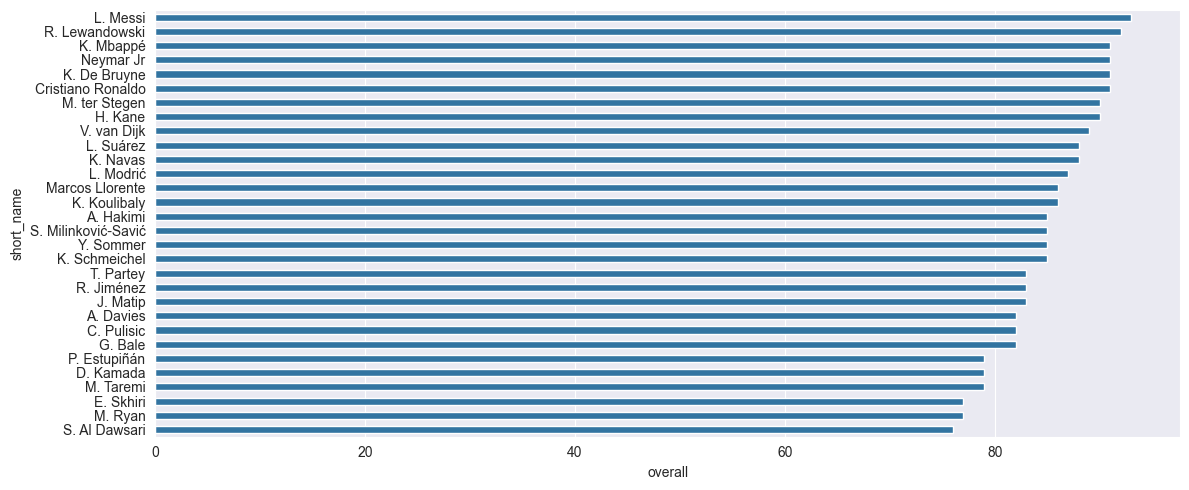

In [73]:
bestPlayerEachCountry = df.copy()
bestPlayerEachCountry = bestPlayerEachCountry.drop_duplicates('nationality_name').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
sns.barplot(bestPlayerEachCountry, x='overall', y='short_name', width=0.5)

plt.show()